In [1]:

import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df1 = pd.read_excel('C:\ExempleDataHL.xlsx')
df1 = df1.dropna()


df2 = pd.read_excel('C:\ExempleDataCHUR.xlsx')
df2 = df2.dropna()

df3 = pd.read_excel('C:\CMD.xlsx')
df3 = df3.dropna()

df4 = pd.read_excel('C:\CHU_2017.xlsx')
df4 = df4.dropna()

df4

,Code,Libelle,Effectif,Duree_sejour_moyen,Age_moyen,Sexe_ratio,Deces
0,01C031,"Craniotomies pour traumatisme, âge supérieur à...",619,4.58,59.70,"79,2 %","13,2 %"
1,01C032,"Craniotomies pour traumatisme, âge supérieur à...",1523,8.23,67.62,"70,1 %","3,9 %"
2,01C033,"Craniotomies pour traumatisme, âge supérieur à...",1288,14.49,69.54,"66,2 %","7,6 %"
3,01C034,"Craniotomies pour traumatisme, âge supérieur à...",1004,37.89,57.33,"73,3 %","20,0 %"
4,01C041,"Craniotomies en dehors de tout traumatisme, âg...",4865,5.49,56.03,"50,1 %","3,3 %"
...,...,...,...,...,...,...,...
2403,28Z22Z,Autres préparations à une irradiation externe,726,0.00,67.95,"36,6 %","0,0 %"
2404,28Z23Z,Techniques complexes d'irradiation externe ave...,176748,0.00,62.33,"29,8 %","0,0 %"
2405,28Z24Z,Techniques complexes d'irradiation externe san...,26828,0.00,63.00,"34,0 %","0,0 %"
2406,28Z25Z,"Autres techniques d'irradiation externe, en sé...",2584,0.00,76.85,"57,5 %","0,0 %"


In [2]:
df3 = pd.read_excel('C:\CMD.xlsx',header=0,converters={'Code':str,'Libelle':str}) # Conversion du code en String
df = pd.DataFrame(columns = ['Code','Libelle', 'Effectif Moyen','Taux Deces', 'Age Moyen'])   
liste = []
liste_code = []
liste_libelle = []
liste_taux_deces = []
liste_age_moyen = []

for ind in df3.index: 
    
        code = df3['Code'][ind]
        libelle = df3['Libelle'][ind]
       
        cmd = df2["Code"].str.startswith(code, na=False)
        
        liste.append(df2[cmd].Effectif.mean())
        liste_code.append(code)
        liste_libelle.append(libelle)
        liste_taux_deces.append(df2[cmd].Deces.mean())
        liste_age_moyen.append(df2[cmd].Age_moyen.mean())
    

        
df['Effectif Moyen'] = liste
df['Code'] = liste_code
df['Libelle'] = liste_libelle
df['Taux Deces'] = liste_taux_deces
df['Age Moyen'] = liste_age_moyen
total2018 = df['Effectif Moyen'].sum()

df = df.dropna()
df = df.reset_index(drop=True)

df




,Code,Libelle,Effectif Moyen,Taux Deces,Age Moyen
0,01,Affections du système nerveux,2055.832487,0.048843,52.485635
1,02,Affections de l’oeil,1663.333333,0.008236,54.838056
2,03,"Affections des oreilles, du nez, de la gorge, ...",981.489796,0.008673,38.139320
3,04,Affections de l'appareil respiratoire,2264.726562,0.051234,47.503750
4,05,Affections de l'appareil circulatoire,2033.495536,0.073165,61.516830
5,06,Affections du tube digestif,2025.993939,0.034139,49.504727
6,07,Affections du système hépatobiliaire et du pan...,1275.948454,0.049402,56.985361
7,08,Affections et traumatismes de l'appareil muscu...,1272.699060,0.018028,52.876583
8,09,"Affections de la peau, des tissus sous-cutanés...",1431.043478,0.022052,51.816087
9,10,"Affections endocriniennes, métaboliques et nut...",1701.462264,0.021896,41.318679


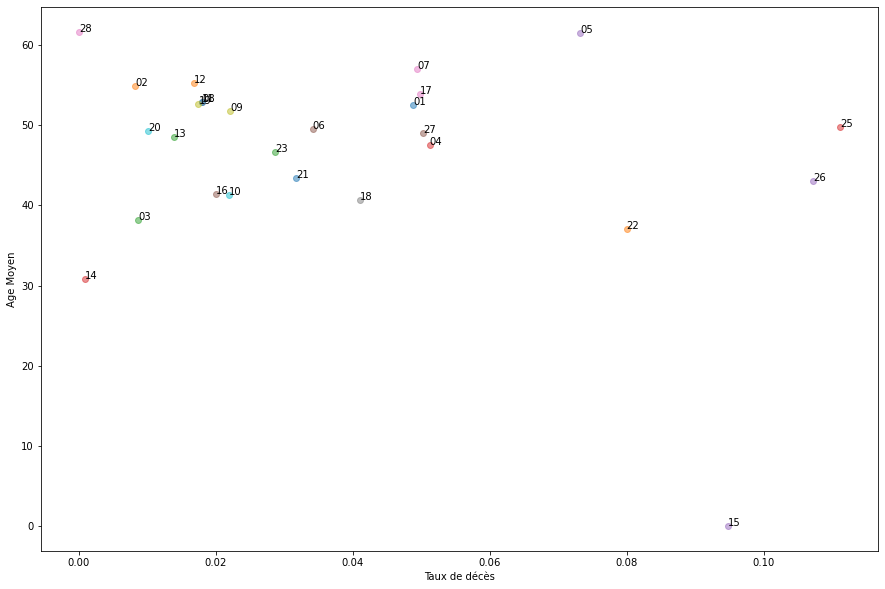

In [3]:
fig, ax = plt.subplots(facecolor='w',figsize =(15,10))
ax.set_xlabel('Taux de décès')
ax.set_ylabel('Age Moyen')

for key, row in df.iterrows():
    ax.scatter(row['Taux Deces'], row['Age Moyen'], alpha=.5)
    ax.annotate(row['Code'], xy=(row['Taux Deces'], row['Age Moyen']))


In [4]:
print("L'Effectif total sur l'ensemble des pathologies est : ",total2018)



L'Effectif total sur l'ensemble des pathologies est :  159593.26845983564


In [5]:
d = df2[df2.Libelle.str.startswith('Sclérose')]
print("Taux de décès moyen pour la sclérose en plaque CHU 2018 :",d['Deces'].mean())


Taux de décès moyen pour la sclérose en plaque CHU 2018 : 0.0246


In [6]:
print("Age moyen pour la sclérose en plaque CHU 2018 :",d['Age_moyen'].mean())

Age moyen pour la sclérose en plaque CHU 2018 : 46.995999999999995


In [7]:
df3 = pd.read_excel('C:\CMD.xlsx',header=0,converters={'Code':str,'Libelle':str}) # Conversion du code en String

dff = pd.DataFrame(columns = ['Code','Libelle', 'Effectif Moyen','Taux de deces', 'Age Moyen'])   
liste = []
liste_code = []
liste_libelle = []
liste_taux_deces = []
liste_age_moyen = []


df4['Deces'] = df4['Deces'].replace(" %","", regex=True)
df4['Deces'] = df4['Deces'].replace(",",".", regex=True)
df4['Deces'] = df4['Deces'].replace(" ","", regex=True).astype(float)

for ind in df3.index: 
    
        code = df3['Code'][ind]
        libelle = df3['Libelle'][ind]
        
        cmd = df4["Code"].str.startswith(code, na=False)
        
        liste.append(df4[cmd].Effectif.mean())
        liste_code.append(code)
        liste_libelle.append(libelle)
        liste_taux_deces.append(df4[cmd].Deces.mean())
        liste_age_moyen.append(df4[cmd].Age_moyen.mean())

        
dff['Effectif Moyen'] = liste
dff['Code'] = liste_code
dff['Libelle'] = liste_libelle

dff['Taux de deces'] = liste_taux_deces
dff['Age Moyen'] = liste_age_moyen
total2017 = dff['Effectif Moyen'].sum()

dff = dff.dropna()
dff = dff.reset_index(drop=True)

dff


,Code,Libelle,Effectif Moyen,Taux de deces,Age Moyen
0,01,Affections du système nerveux,2128.448980,4.921429,52.127347
1,02,Affections de l’oeil,1687.885714,0.500000,54.556429
2,03,"Affections des oreilles, du nez, de la gorge, ...",980.353741,0.851020,38.327891
3,04,Affections de l'appareil respiratoire,2218.132812,5.117969,47.646094
4,05,Affections de l'appareil circulatoire,1968.783186,7.350000,61.612699
5,06,Affections du tube digestif,1986.072289,3.431325,49.283614
6,07,Affections du système hépatobiliaire et du pan...,1270.515464,5.027835,57.031856
7,08,Affections et traumatismes de l'appareil muscu...,1272.570093,1.826480,52.907165
8,09,"Affections de la peau, des tissus sous-cutanés...",1426.965517,2.443966,51.975776
9,10,"Affections endocriniennes, métaboliques et nut...",1728.254717,1.876415,41.221792


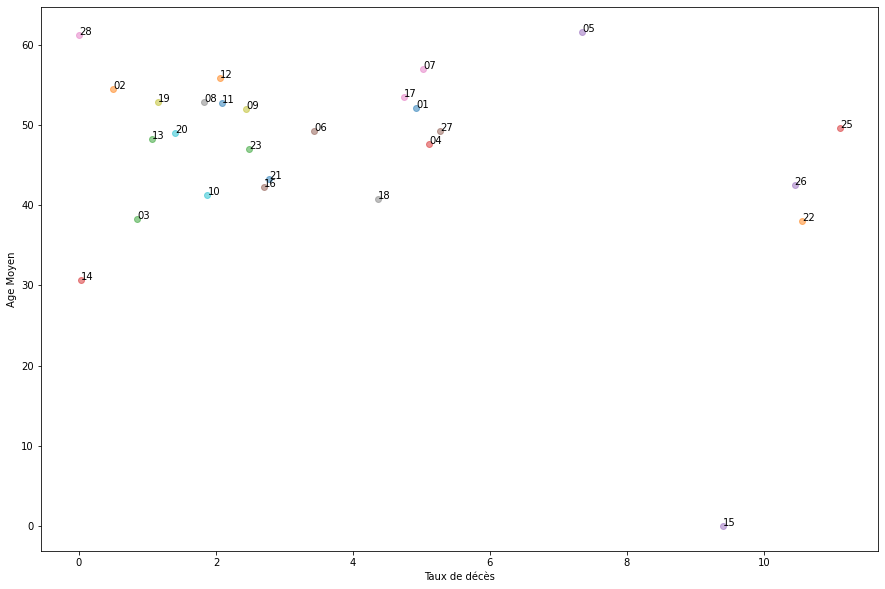

In [8]:
fig, ax = plt.subplots(facecolor='w',figsize =(15,10))
ax.set_xlabel('Taux de décès')
ax.set_ylabel('Age Moyen')

for key, row in dff.iterrows():
    ax.scatter(row['Taux de deces'], row['Age Moyen'], alpha=.5)
    ax.annotate(row['Code'], xy=(row['Taux de deces'], row['Age Moyen']))


In [9]:
ds = df4[df4.Libelle.str.startswith('Sclérose')]
ds

,Code,Libelle,Effectif,Duree_sejour_moyen,Age_moyen,Sexe_ratio,Deces
112,01M17T,"Sclérose en plaques et ataxie cérébelleuse, tr...",2766,0.00,42.35,"28,9 %",0.0
113,01M171,"Sclérose en plaques et ataxie cérébelleuse, ni...",1985,2.74,41.88,"35,7 %",0.0
114,01M172,"Sclérose en plaques et ataxie cérébelleuse, ni...",1322,6.84,44.26,"35,1 %",0.1
115,01M173,"Sclérose en plaques et ataxie cérébelleuse, ni...",441,12.66,56.61,"40,6 %",1.1
116,01M174,"Sclérose en plaques et ataxie cérébelleuse, ni...",101,26.80,50.07,"29,7 %",3.0


In [10]:
print("Taux de décès moyen pour la sclérose en plaque CHU 2017 :",ds['Deces'].mean())

Taux de décès moyen pour la sclérose en plaque CHU 2017 : 0.8400000000000001


In [11]:
print("Age moyen pour la sclérose en plaque CHU 2017 :",ds['Age_moyen'].mean())

Age moyen pour la sclérose en plaque CHU 2017 : 47.034000000000006


In [12]:
print("L'Effectif total sur l'ensemble des pathologies est : ",total2017)

L'Effectif total sur l'ensemble des pathologies est :  156561.72410057922
